### Student performance index, dataset analysis

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns

In [28]:
df = pd.read_csv("Student_Performance.csv")

In [29]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


### OUR GOAL: what are the most important features that affect the performance index (also, which variables are not that useful)

In [30]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


<Axes: xlabel='Performance Index', ylabel='Count'>

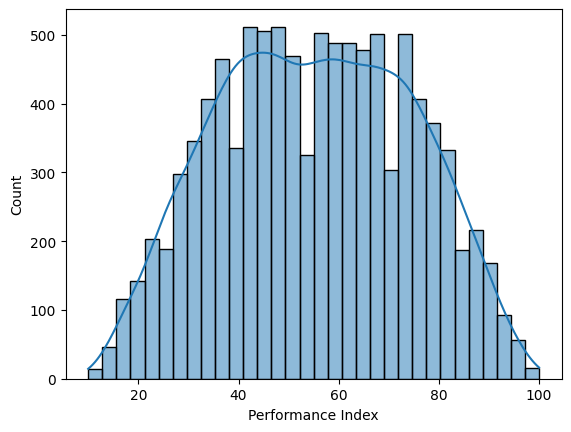

In [ ]:
# very symmetric dataset, looks very synthetic....
sns.histplot(df['Performance Index'], kde=True)

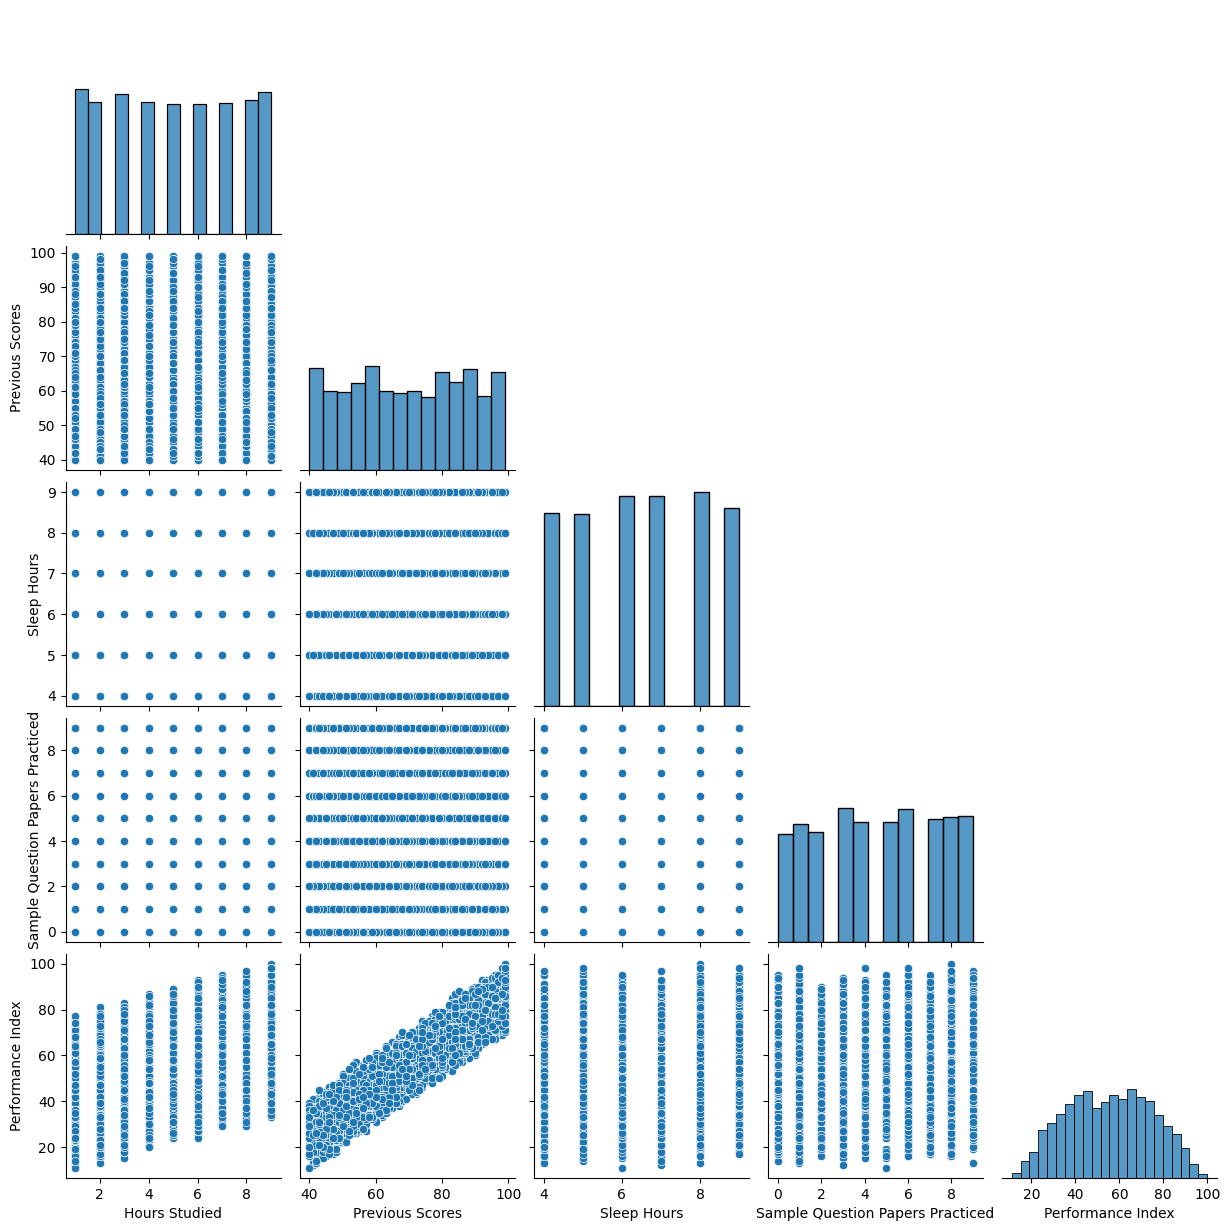

In [32]:
# if you have too much data, might be a good idea to take a smaller sample
df_sample = df.sample(3000)
sns.pairplot(df_sample, corner=True)

Again, very symmetric, probably synthetic. 

In [ ]:
# let's see the column names quickly, so what can we use in the plots
df.head(1)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0


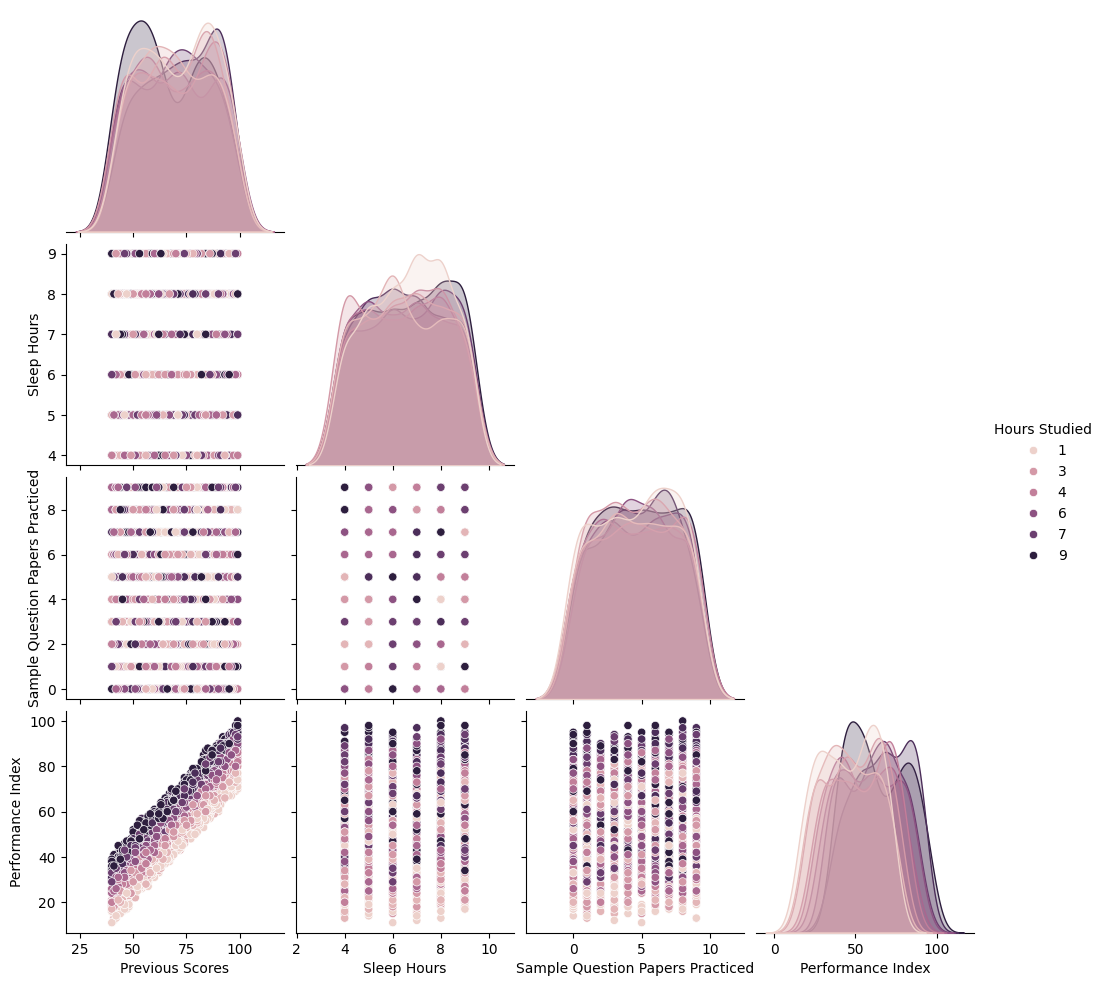

In [ ]:
# let's use Hours studied as the hue
sns.pairplot(df_sample, corner=True, hue="Hours Studied")

**Aha, it seems the data is based on Previous Scores + Hours studied, the gradient in the data (bottom left corner) looks so clean and smooth, this dataset is definitely a synthetic dataset.**

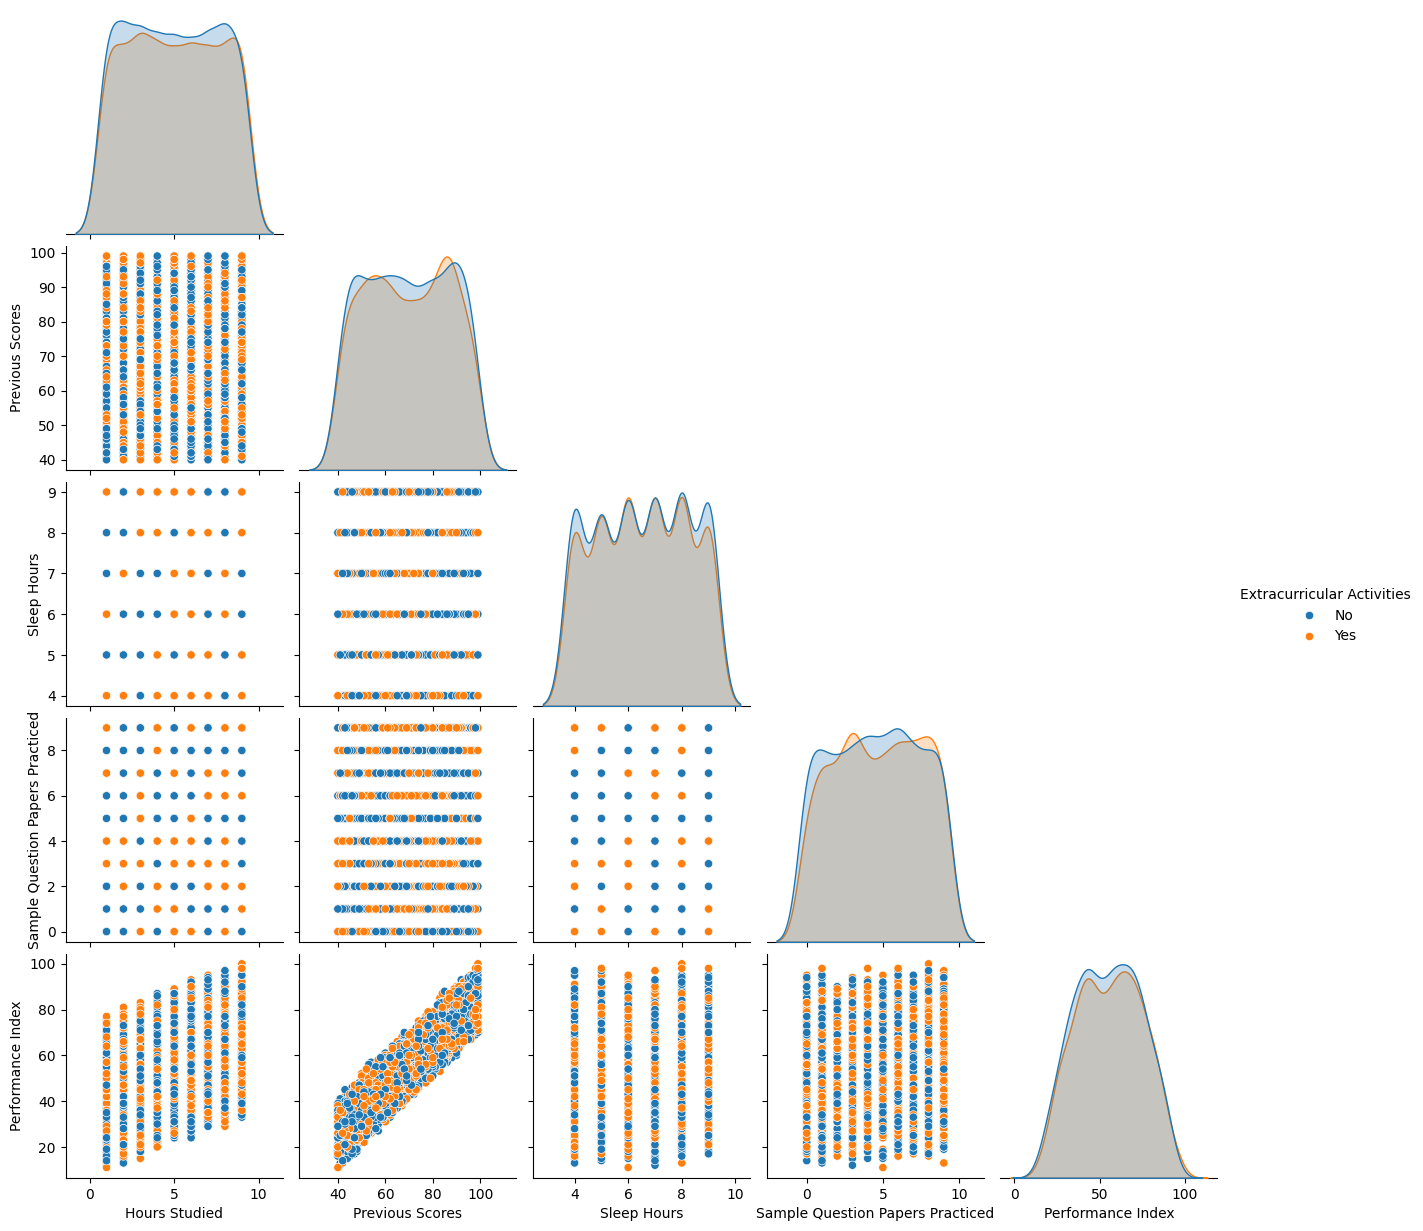

In [ ]:
# let's try this too
sns.pairplot(df_sample, corner=True, hue="Extracurricular Activities")

### Cant' really see nothing in the plot above, probably just random noise.

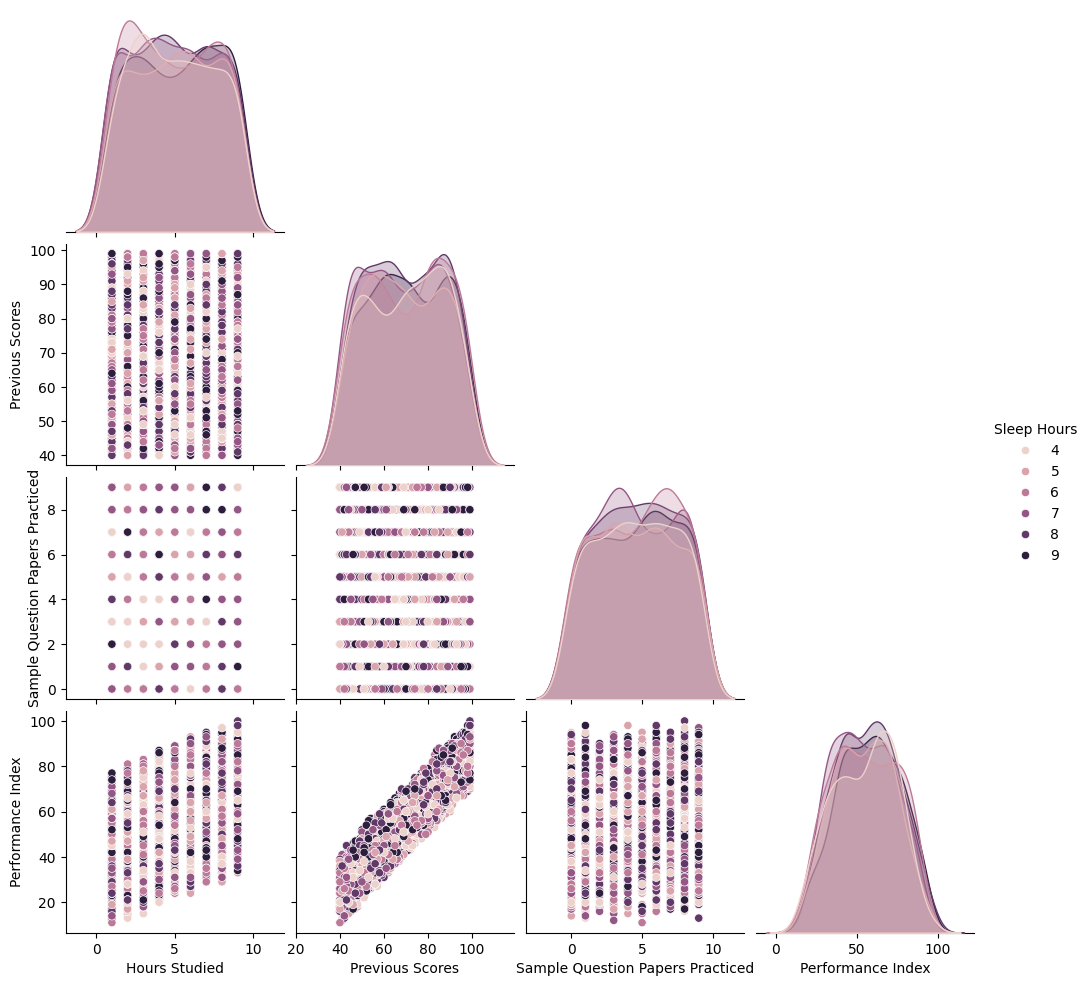

In [ ]:
# let's try sleep hours too
sns.pairplot(df_sample, corner=True, hue="Sleep Hours")

### It's not as bad as with the extracurricular activities, but can't really see much connection in the sleep hours...**

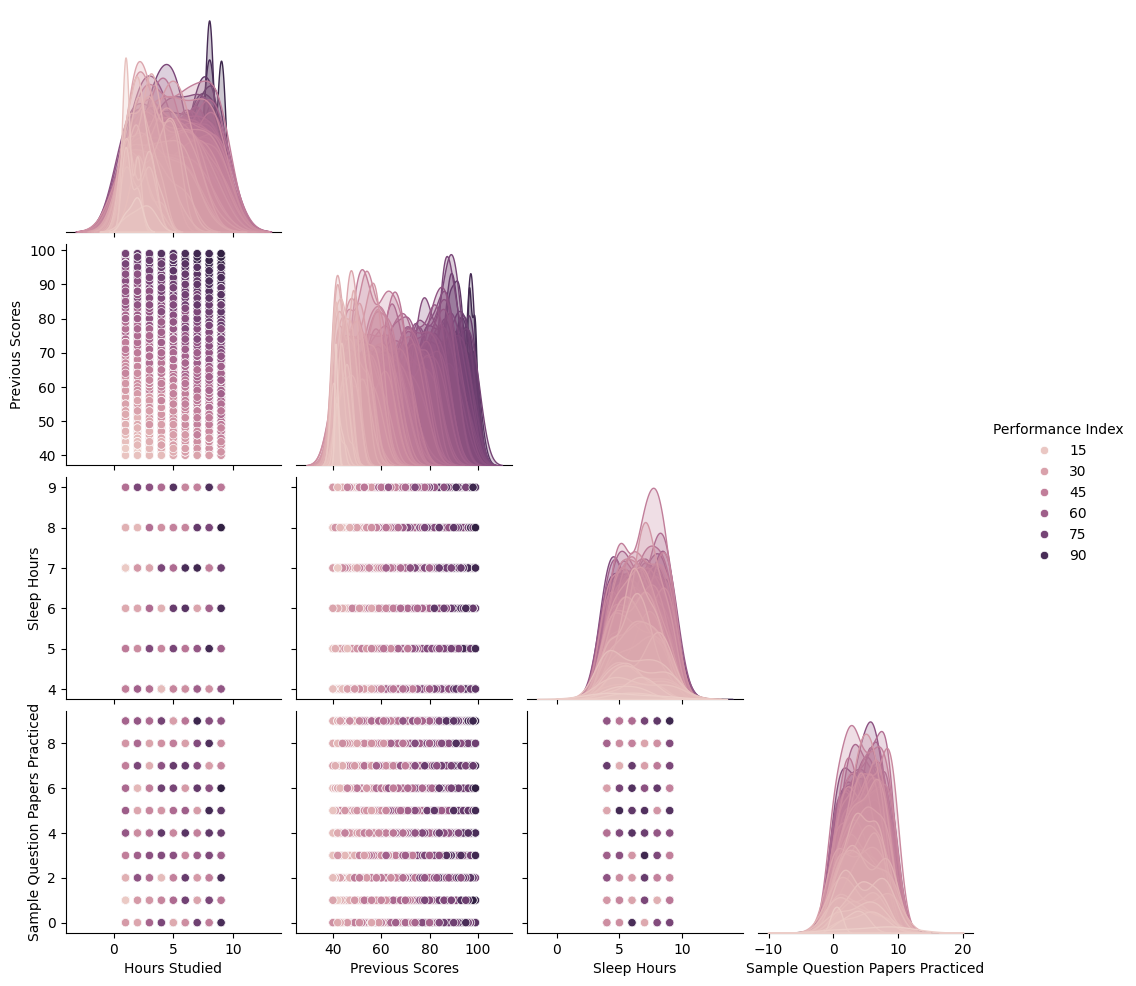

In [ ]:
# we can also see the previous scores vs hours studied, how smooth the gradient is from bottom left to top right
sns.pairplot(df_sample, corner=True, hue="Performance Index")

### Let's try some regression plots too, to see the bigger trend...

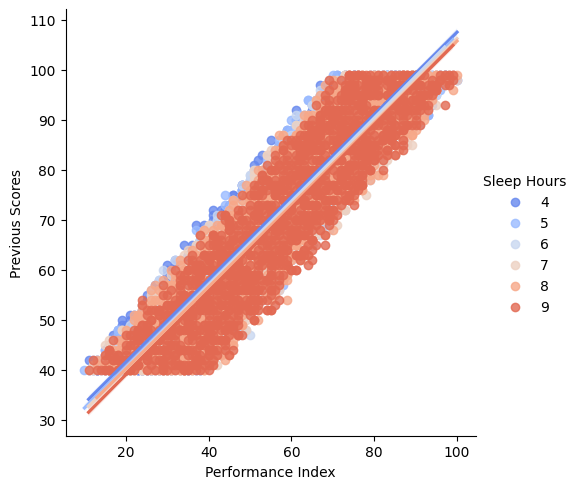

In [ ]:
# nope, sleep hours doesn't affect this
sns.lmplot(x="Performance Index", y="Previous Scores", data=df, hue="Sleep Hours", palette="coolwarm")

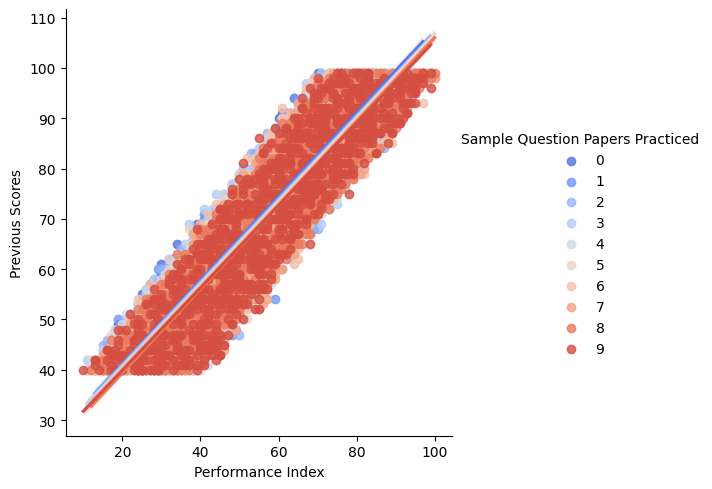

In [ ]:
# also sample question papers doesn't affect this
sns.lmplot(x="Performance Index", y="Previous Scores", data=df, hue="Sample Question Papers Practiced", palette="coolwarm")

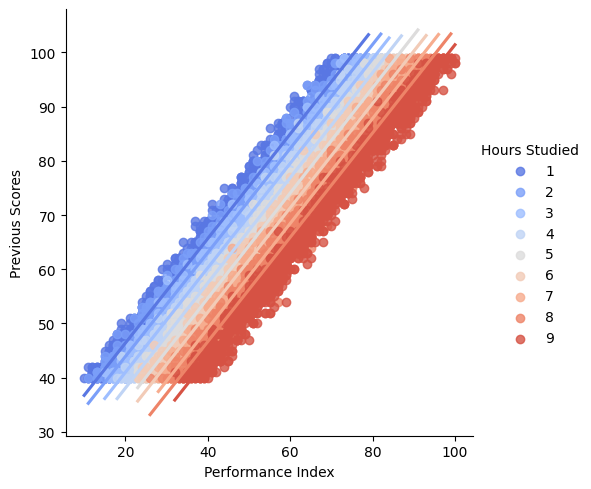

In [ ]:
# yeah, this is the "jackpot", shows exactly how previous scores + hours studied are formulating the "performance index"
sns.lmplot(x="Performance Index", y="Previous Scores", data=df, hue="Hours Studied", palette="coolwarm")